The ECG signal comes from MIT-BIH Arrhythmia Database. The signal is a 5 minute long electrocardiogram (ECG). It is recorded from the record 208 (lead MLII) provided by the MIT-BIH Arrhythmia Database [1] on PhysioNet [2]. It sampled at 360 Hz. The signal excerpt includes noise induced artifacts, typical heartbeats as well as pathological changes.

[1] Moody GB, Mark RG. The impact of the MIT-BIH Arrhythmia Database. IEEE Eng in Med and Biol 20(3):45-50 (May-June 2001). (PMID: 11446209); DOI:10.13026/C2F305

[2] Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals. Circulation 101(23):e215-e220; DOI:10.1161/01.CIR.101.23.e215

In [1]:
import sympy as sym
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import signal
import scipy
from scipy.misc import electrocardiogram
from scipy.fft import fft
from scipy.signal import welch

The picture 1 show the whole picture of the ECG signal. 

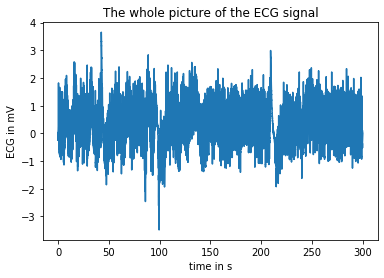

In [2]:
ecg = scipy.misc.electrocardiogram()
fig1 = plt.figure()
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.title('The whole picture of the ECG signal');
plt.show()

The figure 2 shows the typical heartbeats. 

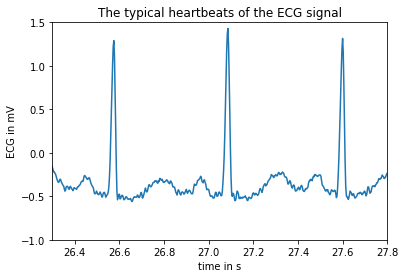

In [3]:
ecg = scipy.misc.electrocardiogram()
fig2 = plt.figure()
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.xlim(26.3, 27.8)
plt.ylim(-1, 1.5)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.title('The typical heartbeats of the ECG signal');
plt.show()

The figure 3 shows the frequency domain of the ECG signal of typical heartbeats. The main frequency is from 1-40Hz. A tiny powerline interference at 60Hz.

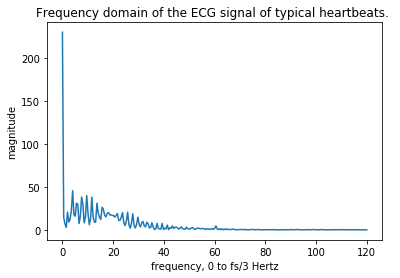

In [4]:
fs = 360
cgvth = ecg[26*360:28*360]
fdcgvth = fft(cgvth)
zoom = 3 # zoom = 15 would just show non-redundant first half below folding freq
half = fdcgvth[0:int((len(fdcgvth)/zoom)-1)]
lFreq = np.linspace(0, fs/zoom, len(half))

plt.figure(3)
plt.title("Frequency domain of the ECG signal of typical heartbeats. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/3 Hertz')
plt.plot(lFreq, abs(half))
plt.show()

The figure 4 shows the first premature ventricular contractions at around 16s. The premarure ventricular have a different morphology compared to typical heartbeats. 

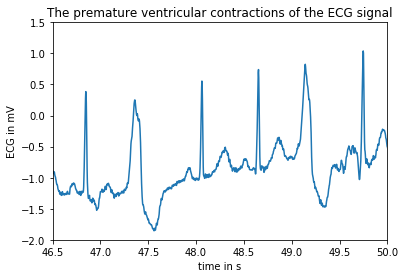

In [5]:
fig4 = plt.figure()
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(46.5, 50)
plt.ylim(-2, 1.5)
plt.title('The premature ventricular contractions of the ECG signal');
plt.show()

The electrocardiogram (ECG) signals has different types of noises, including baseline wander, powerline interference, electromyographic (EMG) noise, electrode motion artifact noise[3]. The figure 5 shows the baseline wander. 

[3]Kher, Rahul. "Signal processing techniques for removing noise from ECG signals." J. Biomed. Eng. Res 3 (2019): 1-9.

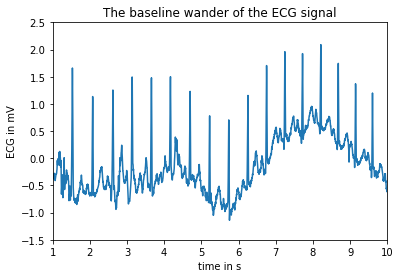

In [6]:
ecg = scipy.misc.electrocardiogram()
fig5 = plt.figure()
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.xlim(1, 10)
plt.ylim(-1.5, 2.5)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.title('The baseline wander of the ECG signal');
plt.show()

Baseline wander is a low-frequency noise of around 0.5 to 0.6 Hz. A high-pass filter of cut-off frequency 0.5 to 0.6 Hz can be used to remove the baseline wander, as shown in figure 6.

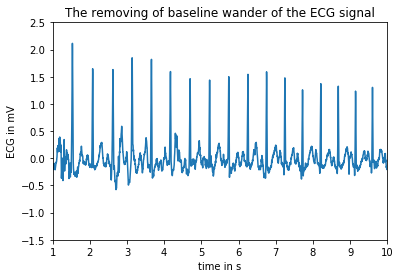

In [7]:
#Create an order 5 lowpass butterworth filter
b, a = scipy.signal.butter(5, 0.005, btype='high')
#Apply the filter to signal1. Use lfilter_zi to choose the initial condition of the filter
zi = scipy.signal.lfilter_zi(b, a)
z, _ = scipy.signal.lfilter(b, a, ecg, zi=zi*ecg[0])
#Use filtfilt to apply the filter
ecgv1 = scipy.signal.filtfilt(b, a, ecg)
#Plot the filtered signal versions
fig6 = plt.figure()
plt.plot(time, ecgv1)
plt.xlim(1, 10)
plt.ylim(-1.5, 2.5)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.title('The removing of baseline wander of the ECG signal');
plt.show()

EMG noise is a high frequency noise. The figure 7 probably show the EMG noise.

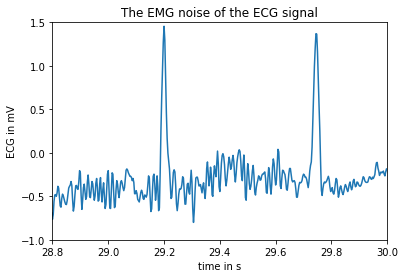

In [8]:
ecg = scipy.misc.electrocardiogram()
fig7 = plt.figure()
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)
plt.xlim(28.8, 30)
plt.ylim(-1, 1.5)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.title('The EMG noise of the ECG signal');
plt.show()

Figure 8 shows the frequency response of signal shown in figure 7. This signal has noise at 55-100 Hz.  

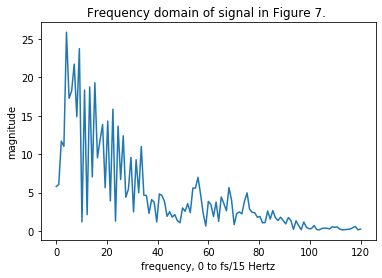

In [9]:
fs = 360
cgemg = ecgv1[29*360:30*360]
fdcgemg = fft(cgemg)
zoom = 3 # zoom = 15 would just show non-redundant first half below folding freq
half = fdcgemg[0:int((len(fdcgemg)/zoom)-1)]
lFreq = np.linspace(0, fs/zoom, len(half))

plt.figure(8)
plt.title("Frequency domain of signal in Figure 7. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/15 Hertz')
plt.plot(lFreq, abs(half))
plt.show()

Since this signal has noise at 55-100 Hz, a low-pass filter is used to remove the majority of noise. The filtered ECG signal is shown in Figure 9.

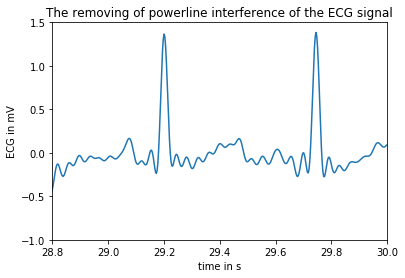

In [10]:
#Create an order 12 lowpass butterworth filter
b, a = scipy.signal.butter(10, 0.15, btype='low')
#Apply the filter to signal1. Use lfilter_zi to choose the initial condition of the filter
zi = scipy.signal.lfilter_zi(b, a)
z, _ = scipy.signal.lfilter(b, a, ecgv1, zi=zi*ecgv1[0])
#Use filtfilt to apply the filter
ecgv2 = scipy.signal.filtfilt(b, a, ecgv1)
#Plot the filtered signal versions
fig9 = plt.figure()
plt.plot(time, ecgv2)
plt.xlim(28.8, 30)
plt.ylim(-1, 1.5)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.title('The removing of powerline interference of the ECG signal');
plt.show()

At 207s to 215s, a electrode motion artifacts is observed as shown in Figure 10. The electride motion artifacts can be suppressed by minimizing the movements of the patient. It is not easy to be removed via signal processing.

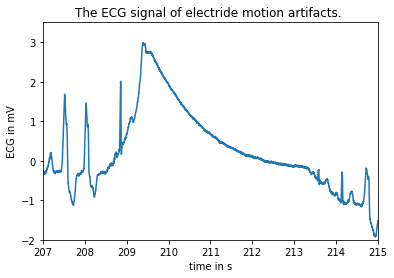

In [11]:
fig10 = plt.figure()
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.title("The ECG signal of electride motion artifacts. ")
plt.xlim(207, 215)
plt.ylim(-2, 3.5)
plt.show()

Powerline interference is a 50 or 60 Hz noise from mains supply. The frequency response of the whole signal is shown in Figure 11. The power spectrum is shown in Figure 12. The main biosignal is from 1-40 Hz. The powerline interference can be observed at 60 Hz.

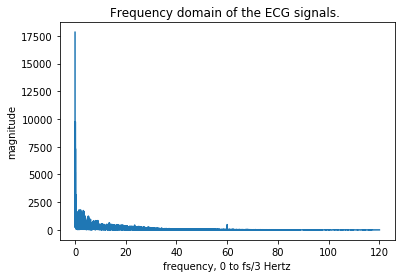

In [12]:
fs = 360
fdcg = fft(ecg)
zoom = 3 # zoom = 15 would just show non-redundant first half below folding freq
half = fdcg[0:int((len(fdcg)/zoom)-1)]
lFreq = np.linspace(0, fs/zoom, len(half))

plt.figure(11)
plt.title("Frequency domain of the ECG signals. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/3 Hertz')
plt.plot(lFreq, abs(half))
plt.show()

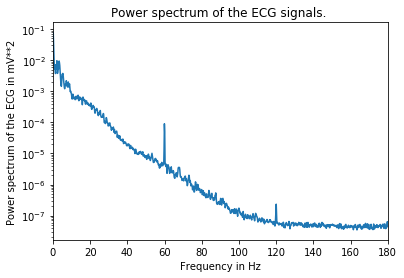

In [13]:
plt.figure(12)
f, Pxx = welch(ecg, fs=fs, nperseg=2048, scaling="spectrum")
plt.semilogy(f, Pxx)
plt.xlabel("Frequency in Hz")
plt.ylabel("Power spectrum of the ECG in mV**2")
plt.title("Power spectrum of the ECG signals. ")
plt.xlim(f[[0, -1]])
plt.show()

The powerline interference of ECG could be removed using a notch filter of 50 or 60 Hz cut-off frequency, as shown in Figure 13 and Figure 14.

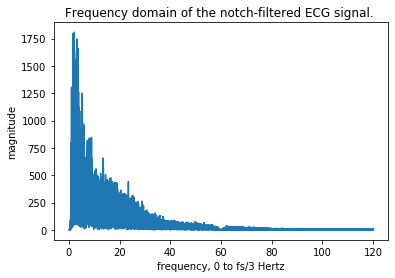

In [14]:
fs = 360  # Sample frequency (Hz)
f0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
# Design notch filter
b, a = signal.iirnotch(f0, Q, fs)
zi = scipy.signal.lfilter_zi(b, a)
z, _ = scipy.signal.lfilter(b, a, ecgv1, zi=zi*ecgv1[0])
ecgv3 = scipy.signal.filtfilt(b, a, ecgv1)
plt.figure(13)
fs = 360
fdcg = fft(ecgv3)
zoom = 3 # zoom = 15 would just show non-redundant first half below folding freq
half = fdcg[0:int((len(fdcg)/zoom)-1)]
lFreq = np.linspace(0, fs/zoom, len(half))
plt.title("Frequency domain of the notch-filtered ECG signal. ")
plt.ylabel('magnitude')
plt.xlabel('frequency, 0 to fs/3 Hertz')
plt.plot(lFreq, abs(half))
plt.show()


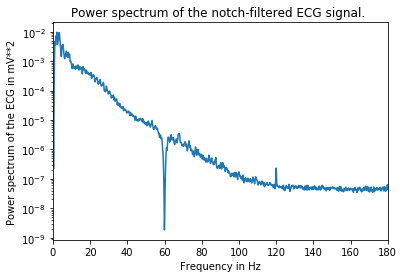

In [15]:
plt.figure(14)
f, Pxx = welch(ecgv3, fs=fs, nperseg=2048, scaling="spectrum")
plt.semilogy(f, Pxx)
plt.xlabel("Frequency in Hz")
plt.ylabel("Power spectrum of the ECG in mV**2")
plt.title("Power spectrum of the notch-filtered ECG signal. ")
plt.xlim(f[[0, -1]])
plt.show()

The whole picture of ECG after signal processing is shown in Figure 15

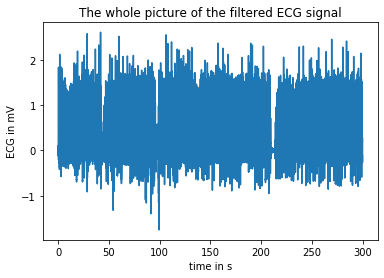

In [16]:
fig15 = plt.figure()
plt.plot(time, ecgv3)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.title('The whole picture of the filtered ECG signal');
plt.show()

The detail of processed ECG signal is shown in Figure 16.

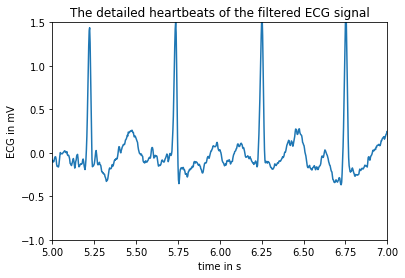

In [17]:
ecg = scipy.misc.electrocardiogram()
fig16 = plt.figure()
fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecgv3)
plt.xlim(5, 7)
plt.ylim(-1, 1.5)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.title('The detailed heartbeats of the filtered ECG signal');
plt.show()

After signal processing, the baseline wander, powerline interference, EMG noise is removed from ECG signal. Electrode motion artifact noise is not easy to process via signal processing. The electride motion artifacts can be suppressed by minimizing the movements of the patient. 